## Código del proyecto


## 1. ELEGIR TEMÁTICA

La temática estará relacionada con las platas solares fotovoltaicas en Europa.
Me gustaría conocer si los países europeos que apuestan por está energía renovable es únicamente por la irradiancia solar que reciben o si hay algún parámetro más que afecte.


## 2. OBTENCIÓN DE DATOS

He buscado en las siguientes plataformas que datos hay disponibles para Europa:

-	https://datacommons.org/

	Población total, Esperanza de vida, Personas desempleadas, Nivel de educación, Generación anual de energía solar, Capacidad instalada de energía solar, Flujo financiero de apoyo a la energía solar, Precipitación media, Superficie país
-	https://datacatalog.worldbank.org

	Irradiancia solar, Desarrollo humano, PIB, Consumo energía, Coste de construcción

	
En líneas generales, los datos estaban aceptables y manejables a excepción de la precipitación media. Estos datos han tenido que ser buscados en reiteradas ocasiones puesto que no eran representativos. 
Con el resto de los datos no se han necesitado hacer más búsquedas.


## 3. DEFINICIÓN DE HIPÓTESIS

Las plantas fotovoltaicas...
-	¿Dependen exclusivamente de la irradiación horizontal global (GHI)?
-	¿Qué características tiene un país europeo que apuesta por la energía solar fotovoltaica?
-	¿Dependerá del tipo de población?
    	Habitantes / km2, Desarrollo humano, Consumo energético medio
-	¿Dependerá del clima?
    	Precipitaciones medias
-	¿Dependerá de la superficie del país?
        Superficie km2
-	¿Dependerá de parámetros económicos?
        PIB, Coste de construcción


## 4. PROCESADO DE DATOS

Importamos bibliotecas

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Cargamos archivos e informacion, en el proyecto del EDA ya limpiamos los datos. Solo nos quedamos con los paises Europeos.

In [2]:

# Ruta info de irradiancia
file_path = "./src/data/solargis_pvpotential_countryranking_2020_data.xlsx"
df_ = pd.read_excel(file_path,sheet_name="Country indicators", header=1)

In [3]:
df_.head(2)

,ISO_A3,Country or region,Note,World Bank \nRegion,"Total population, 2018","Total area, 2018",Evaluated area,Level 1 area \n(% of evaluated area),"Human development \nIndex, 2017","Gross domestic product (USD per capita), 2018",...,"Average practical potential \n(PVOUT Level 1, \nkWh/kWp/day), long-term","Average economic potential (LCOE, USD/kWh), 2018","Average PV \nseasonality index, long-term","PV equivalent area (% of total area), long-term","Cummulative installed PV capacity (MWp), 2018","Cummulative installed PV capacity (Wp per capita), 2018","Access to electricity\n(% of rural population), 2016","Electric power consumption (kWh per capita), 2014","Reliability of supply and transparency of tariff index, 2019","Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019"
0,ABW,Aruba (Neth.),NaN,Other,105845,180.0,180,0.847926,NaN,25630.266492,...,4.9646,0.0853,1.1803,NaN,6.1,57.631442,92.452844,NaN,NaN,NaN
1,AFG,Afghanistan,NaN,SOA,37172386,652860.0,652860,0.587350,0.497695,520.896603,...,5.0159,0.0851,1.6665,NaN,22.0,0.591837,78.961074,NaN,0.0,17.6


In [4]:
df_.columns
columna_deseada= [  "Country or region",
                    'Total population, 2018',
                    'Human development \nIndex, 2017',
                    'Gross domestic product (USD per capita), 2018',
                    'Average theoretical potential (GHI, kWh/m2/day), \nlong-term',
                    'Average economic potential (LCOE, USD/kWh), 2018',
                    'Cummulative installed PV capacity (MWp), 2018', 
                    'Electric power consumption (kWh per capita), 2014',
                    'Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019']

In [5]:
df_global_en = df_[columna_deseada]
df_global_en

,Country or region,"Total population, 2018","Human development \nIndex, 2017","Gross domestic product (USD per capita), 2018","Average theoretical potential (GHI, kWh/m2/day), \nlong-term","Average economic potential (LCOE, USD/kWh), 2018","Cummulative installed PV capacity (MWp), 2018","Electric power consumption (kWh per capita), 2014","Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019"
0,Aruba (Neth.),105845,NaN,25630.266492,6.1098,0.0853,6.1,NaN,NaN
1,Afghanistan,37172386,0.497695,520.896603,5.4904,0.0851,22.0,NaN,17.6
2,Angola,30809762,0.581179,3432.385736,5.7467,0.0919,13.4,312.228825,4.6
3,Albania,2866376,0.784911,5253.630064,4.1954,0.1051,1.0,2309.366503,8.7
4,Andorra,77006,0.857684,42029.762737,4.0490,0.0986,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
204,Kosovo,1845300,NaN,4281.292329,3.8542,0.1150,NaN,NaN,NaN
205,Republic of Yemen,28498687,0.451900,944.408499,6.4675,0.0818,150.0,219.799922,NaN
206,South Africa,57779622,0.699030,6374.015446,5.6293,0.1146,2558.8,4197.907047,14.8
207,Zambia,17351822,0.588083,1539.900158,5.8834,0.0880,5.0,717.349168,4.7


In [6]:
renombrar = { "Country or region": "pais",
             'Total population, 2018' : "poblacion",
              'Human development \nIndex, 2017': "desarrollo_humano_porcentaje",
              'Gross domestic product (USD per capita), 2018': "pib_usd_per_capita",
              'Average theoretical potential (GHI, kWh/m2/day), \nlong-term' : "irradiancia_kwh/m2/day",
              'Average economic potential (LCOE, USD/kWh), 2018': "coste_construccion_usd/kwh",
              'Cummulative installed PV capacity (MWp), 2018': "capacidad_instalada_mwp", 
              'Electric power consumption (kWh per capita), 2014': "consumo_kwh_per_capita",
              'Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019': "tarifa_luz_uscent/kwh" }
df_global = df_global_en.rename(columns= renombrar)

In [7]:
df_global.set_index("pais", inplace=True)

In [8]:
df_global["capacidad_instalada_wp_per_capita"] = df_global["capacidad_instalada_mwp"]*1000000/ df_global["poblacion"]
df_global.drop(columns = ["capacidad_instalada_mwp", "poblacion"], inplace=True)

In [9]:

# Comprobar si hay valores nulos en y_train
print("Valores nulos en y_train:", df_global["capacidad_instalada_wp_per_capita"].isnull().sum())

Valores nulos en y_train: 6


In [10]:
df_global.dropna(subset=["capacidad_instalada_wp_per_capita"], inplace= True)

print("Valores nulos en y_train:", df_global["capacidad_instalada_wp_per_capita"].isnull().sum())

Valores nulos en y_train: 0


## 5. TRAIN / TEST

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
train_set, test_set = train_test_split(df_global, test_size= 0.2, random_state= 42)

In [12]:
#Definimos el target y features
target = "capacidad_instalada_wp_per_capita"
features = [col for col in train_set.columns if col != target]

X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

## 6. EXPLORATORIO Y VISUALIZACIÓN

In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, Samoa to Liberia
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   desarrollo_humano_porcentaje       147 non-null    float64
 1   pib_usd_per_capita                 154 non-null    float64
 2   irradiancia_kwh/m2/day             162 non-null    float64
 3   coste_construccion_usd/kwh         162 non-null    float64
 4   consumo_kwh_per_capita             111 non-null    float64
 5   tarifa_luz_uscent/kwh              143 non-null    float64
 6   capacidad_instalada_wp_per_capita  162 non-null    float64
dtypes: float64(7)
memory usage: 10.1+ KB


In [14]:
train_set.describe() #Datos no estandarizados

,desarrollo_humano_porcentaje,pib_usd_per_capita,irradiancia_kwh/m2/day,coste_construccion_usd/kwh,consumo_kwh_per_capita,tarifa_luz_uscent/kwh,capacidad_instalada_wp_per_capita
count,147.000000,154.000000,162.000000,162.000000,111.000000,143.000000,162.000000
mean,0.718591,17206.239445,4.808498,0.101836,4093.471243,15.775524,45.759558
std,0.151005,23750.591890,0.970068,0.019429,4355.121896,9.710791,88.632067
min,0.353931,275.429603,2.583300,0.067300,39.055805,0.800000,0.000000
25%,0.596567,2074.402645,4.143725,0.089800,1012.525022,9.700000,0.645328
50%,0.749773,7133.368934,5.045300,0.099300,2619.960616,13.500000,7.380572
75%,0.846611,23842.850750,5.562750,0.109150,5971.035736,19.350000,50.115507
max,0.952522,165028.245029,6.467500,0.232200,22999.934595,67.400000,553.854467


Análisis exploratorio

Visualización de variables

Voy a dejar las variables con un # para que no se haga tan extenso el notebook, en el notebook codigo podeis encontrarlo

1 variable - Histograma y función densidad

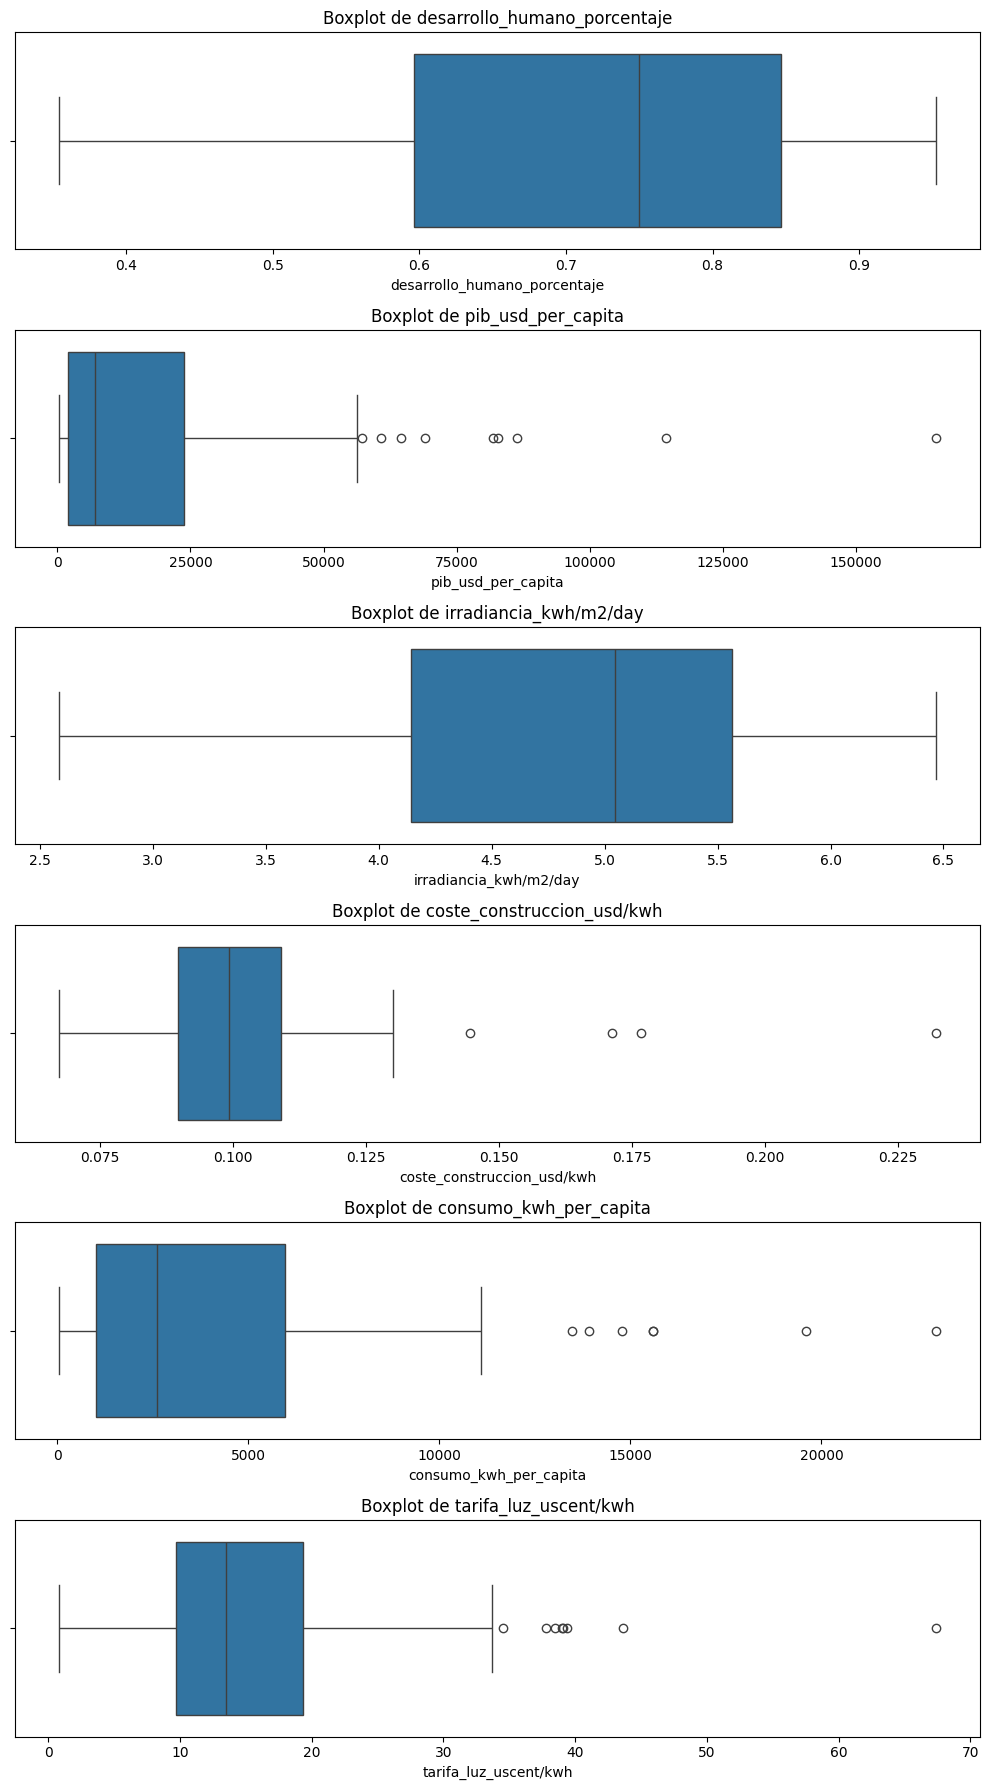

In [15]:
plt.figure(figsize=(10, len(X_train.columns) * 3))

for i, column in enumerate(X_train.columns):
    plt.subplot(len(X_train.columns), 1, i + 1)  # Subplot dinámico
    sns.boxplot(x=X_train[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

In [16]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

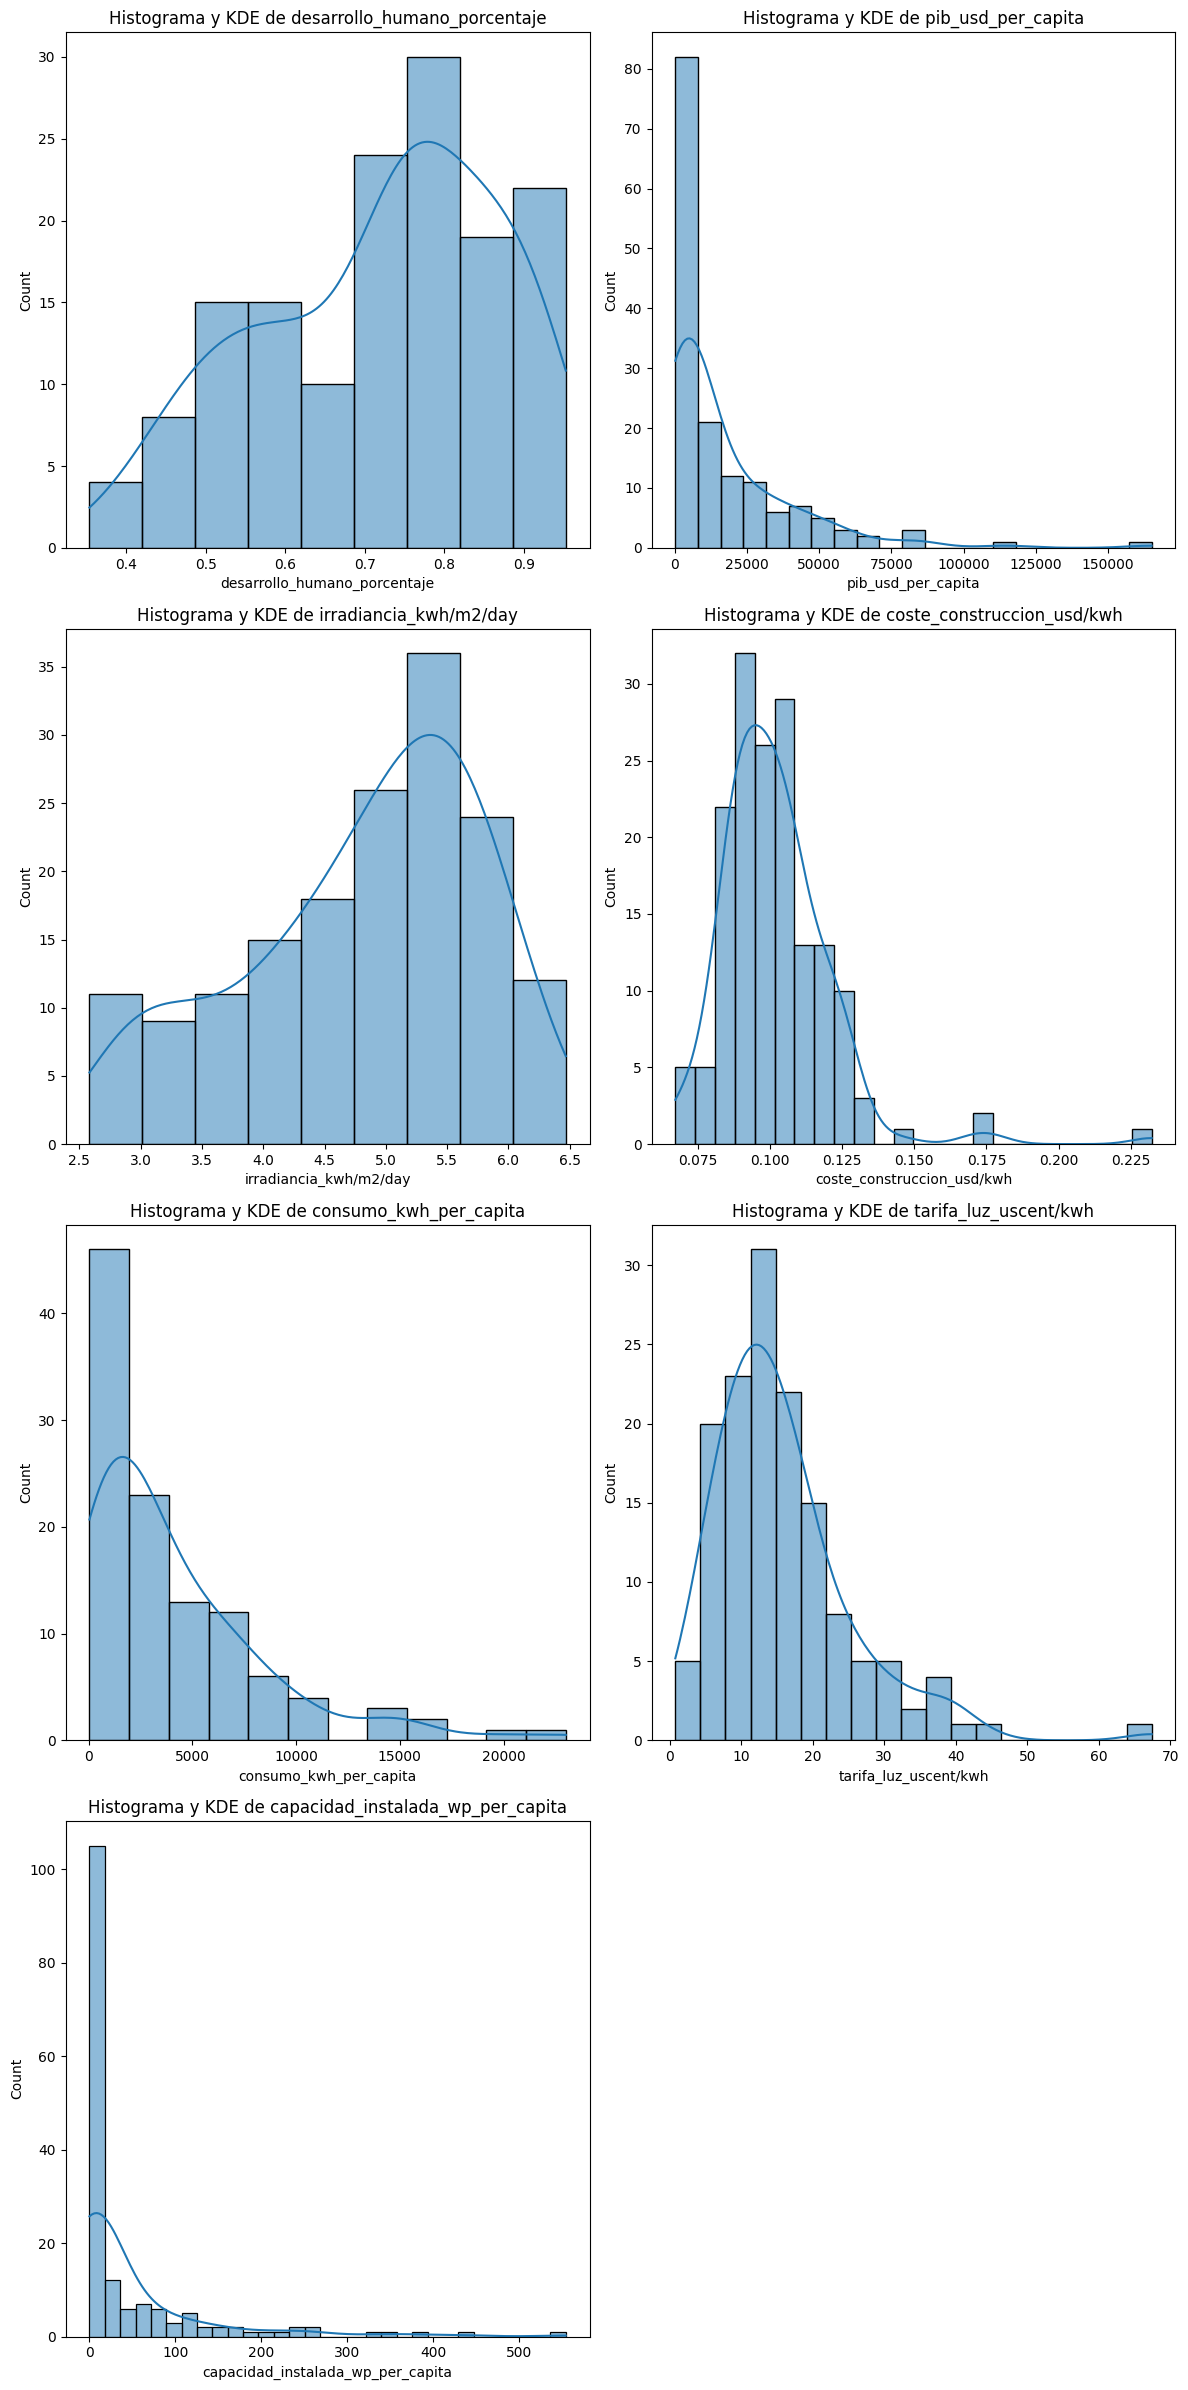

In [17]:
#Vemos todos los histogramas de df_eu_final
plot_histo_dens(train_set, train_set.columns)

In [18]:
#Vemos que tenemos desbalanceado el target. 

1 variable - Tratar las variables numericas como si fueran categoricas

In [19]:
#Función para Graficas de distribución categoricas 
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


Matriz de correlación

C:\Users\USER\AppData\Local\Temp\ipykernel_24652\2143004341.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)


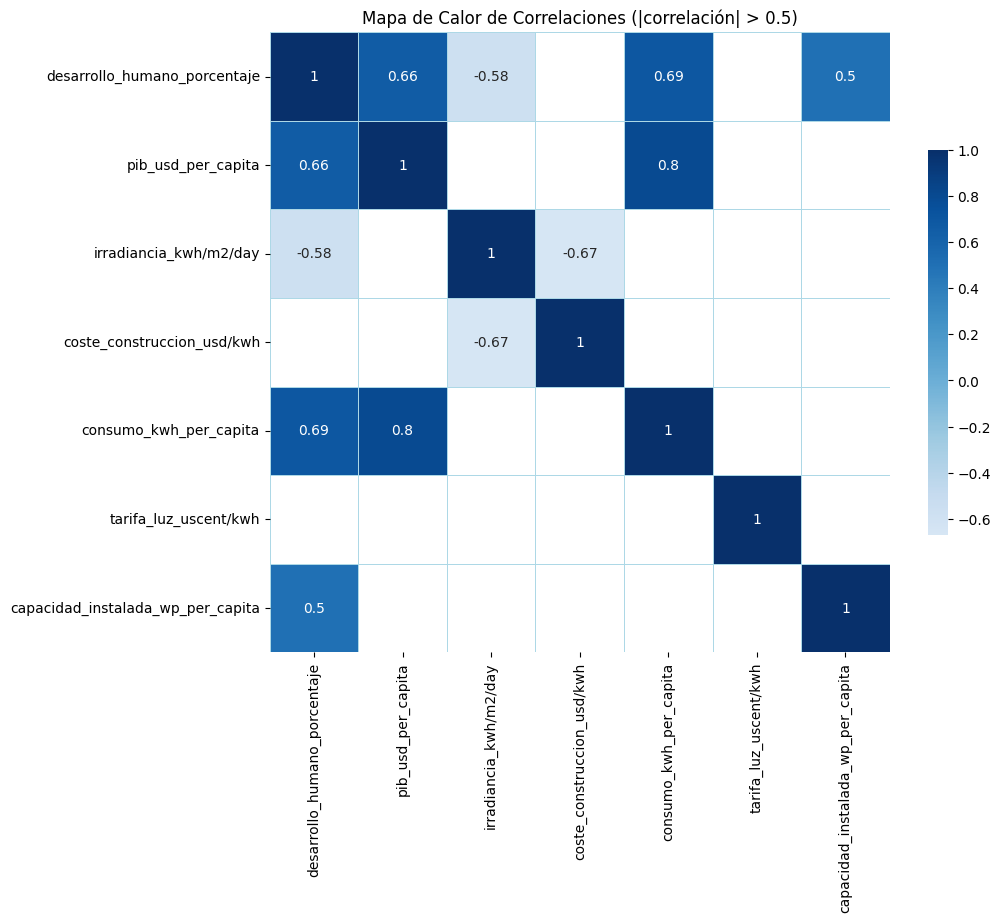

In [20]:
#Ver matriz de correlaciones solo valores más representativos
def mapa_calor_correlacion( df,porcentaje):
    # Supongamos que df_eu es tu DataFrame y ya has calculado la matriz de correlación
    matriz_correlacion = df.corr()

    # Filtrar la matriz de correlación para dejar solo valores superiores a 0.5 o inferiores a -0.5
    filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)

    # Crear el mapa de calor
    plt.figure(figsize=(10, 10))
    sns.heatmap(filtro_correlacion,
                square=True, 
                annot=True, 
                cmap='Blues', 
                center=0,
                cbar_kws={'shrink': .5},
                linewidths=.5,
                linecolor='lightblue')

    plt.title(f'Mapa de Calor de Correlaciones (|correlación| > {porcentaje})')
    return plt.show()


mapa_calor_correlacion(train_set, 0.5)
#Esta imagen, ira a la presentación

3 variables - Gráficos de dispersion

In [21]:
#Funcion para grafico de dispersión con 3 variables y todos los parametros
def dispersion_3_var(df,x1, z1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[z1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

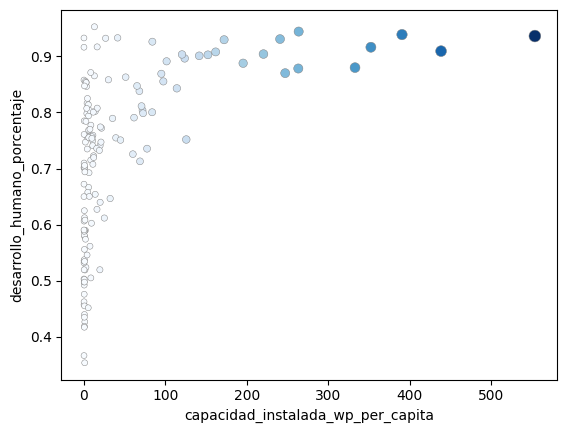

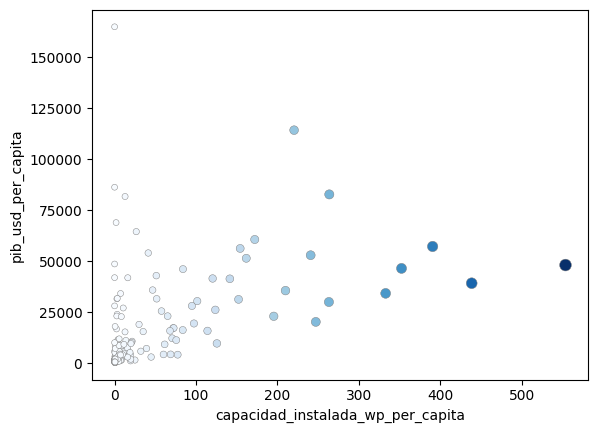

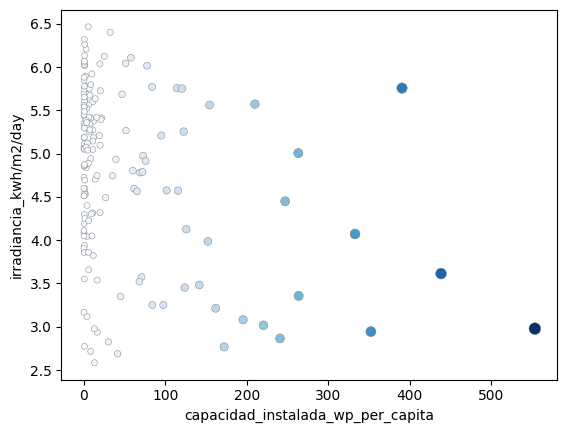

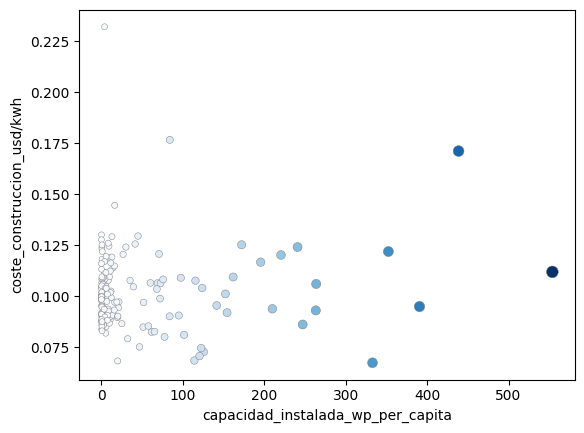

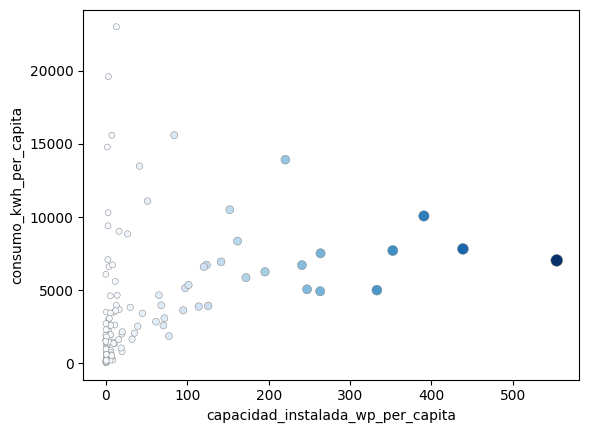

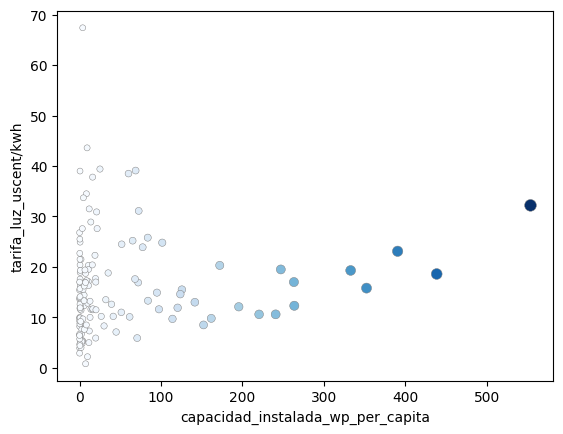

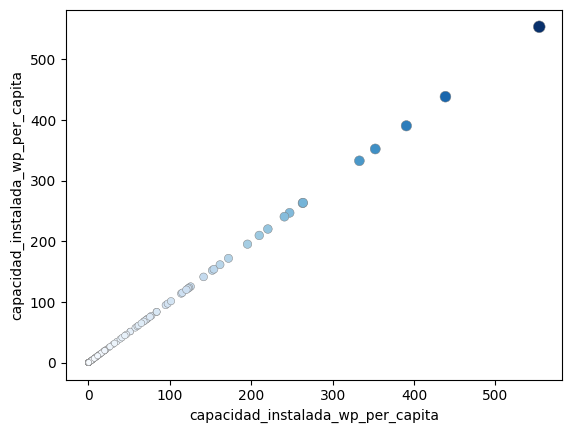

In [22]:
#VARIABLE CAPACIDAD INSTALADA COMO PRINCIPAL
dispersion_3_var(train_set,"capacidad_instalada_wp_per_capita","capacidad_instalada_wp_per_capita")

4 variables - Gráfico de dispersión

In [23]:
#Función grafico dispersión de 4 variables
def dispersion_4_var(df,x1,z1,w1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[w1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

In [24]:
train_set.columns

Index(['desarrollo_humano_porcentaje', 'pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh',
       'consumo_kwh_per_capita', 'tarifa_luz_uscent/kwh',
       'capacidad_instalada_wp_per_capita'],
      dtype='object')

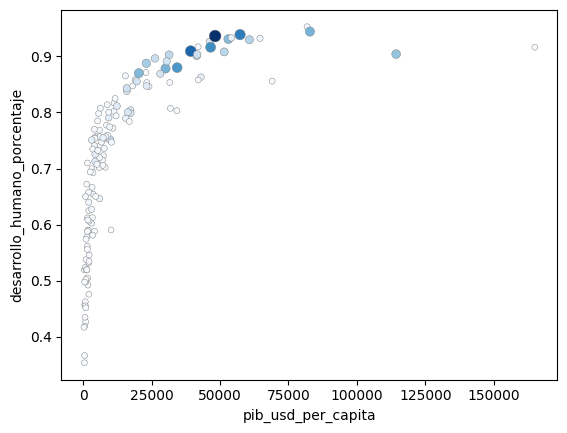

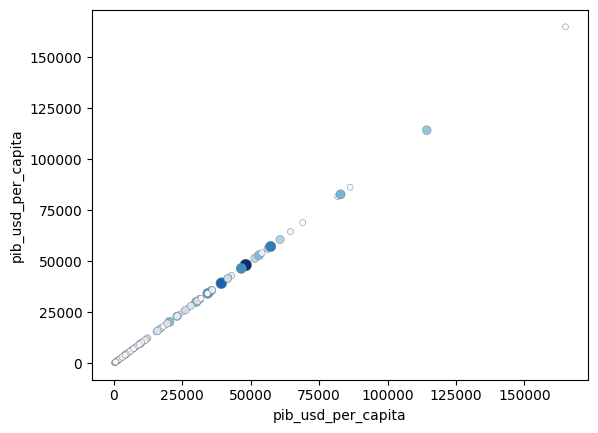

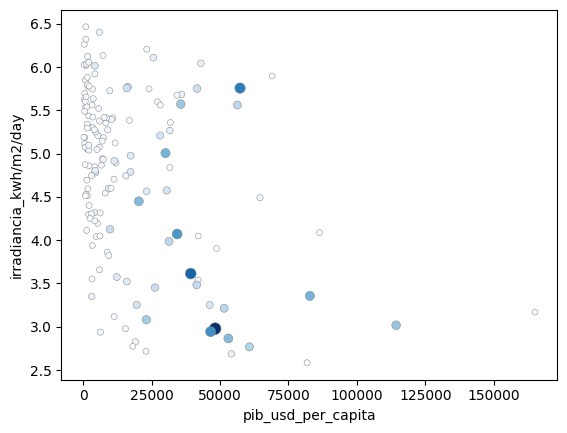

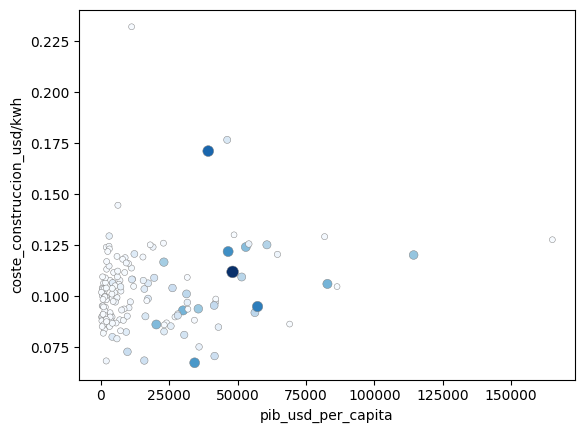

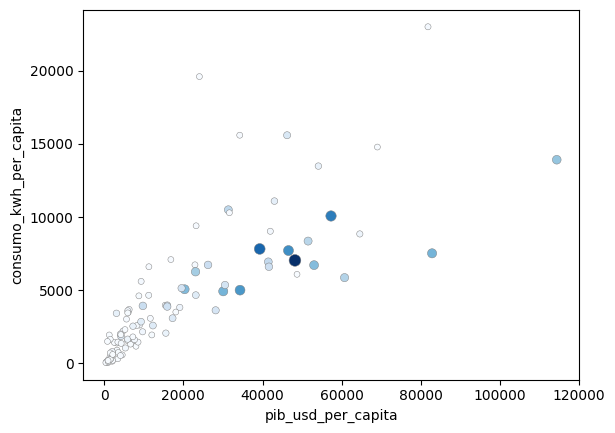

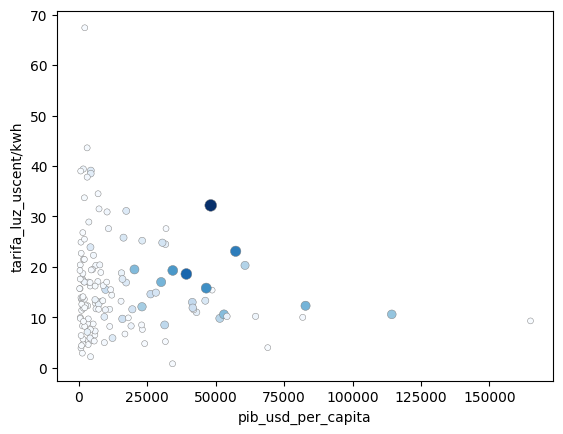

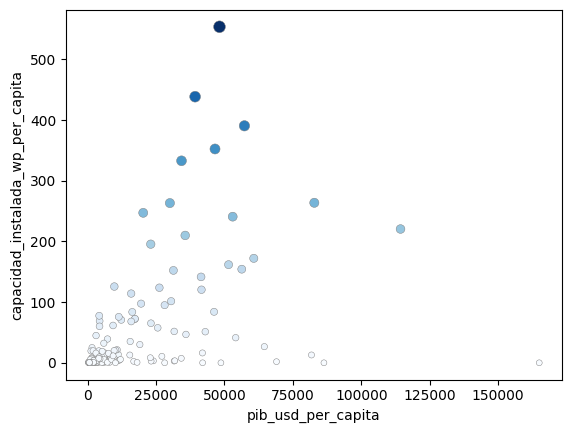

In [25]:
dispersion_4_var(train_set,'pib_usd_per_capita', 'capacidad_instalada_wp_per_capita', 'capacidad_instalada_wp_per_capita' )

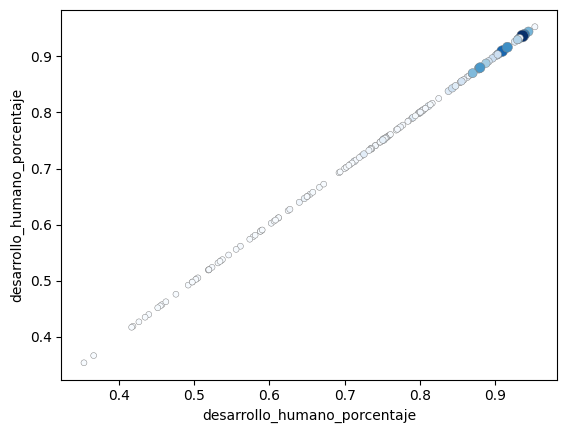

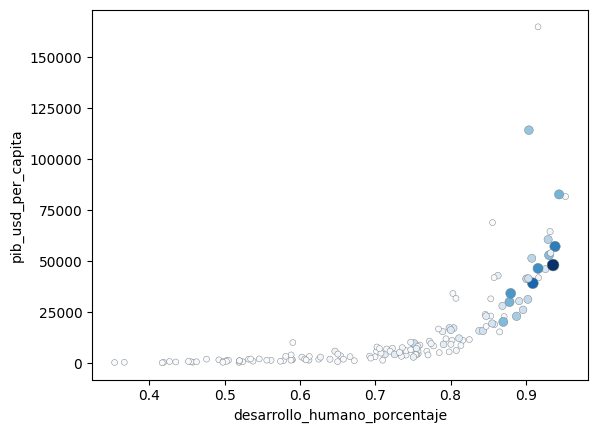

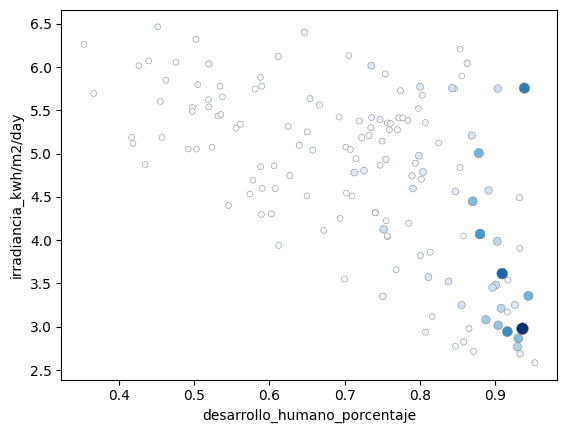

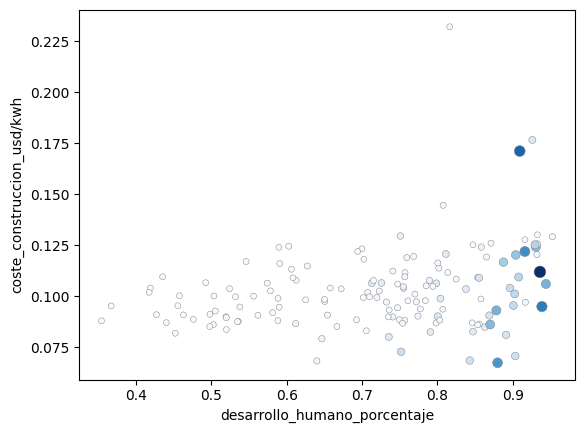

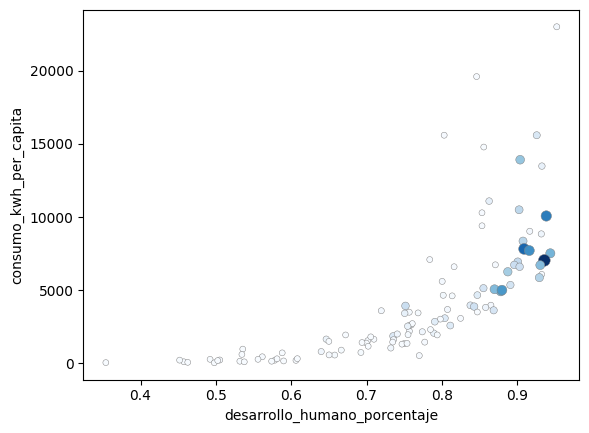

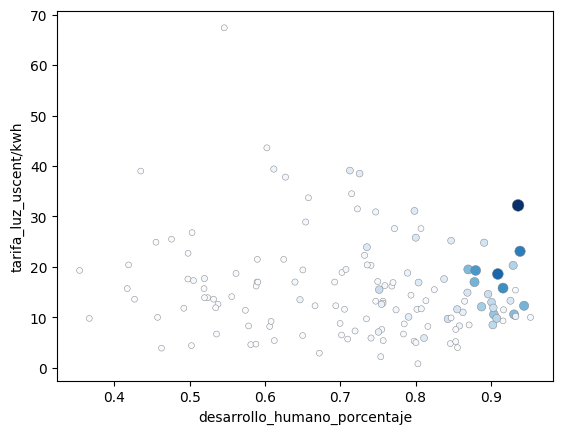

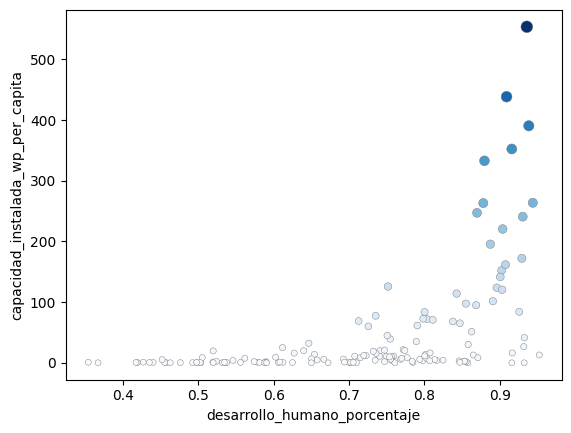

In [26]:
dispersion_4_var(train_set,'desarrollo_humano_porcentaje', 'capacidad_instalada_wp_per_capita', 'capacidad_instalada_wp_per_capita' )

## 7. CONCLUSIÓN ANALISIS


La hipótesis inicial era la inversión en plantas solares debido a la alta irradiancia. Está hipótesis, es “falsa” a medias. 
Porque, además de la irradiancia depende de otros parámetros.

Parece que el parámetro más claro es el del desarrollo humano. Si tuvieramos un missing no podriamos calcular el modelo?
Separar en dos modelos: desarrollo <> 0.85. (Según estudio mini EDA)

Comprobación de separación de dos modelos con Kmeans.

Es importante separar el modelo en dos porque tenemos los datos desbalanceados.


## 8. ESTUDIO MACHINE LEARNING - CATBOOST NUMERICO

1. Rellenar missing - knn + Escalado MinMax.
2. CatBoost
3. Predición numérica.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import pandas as pd

In [28]:
def dispersion_pred_real(y_train, y_pred, color_dim=None):
    """
    Grafica la relación entre valores reales y predicciones, con una dimensión adicional representada por el color.

    Parámetros:
    - y_train: Valores reales (array-like)
    - y_pred: Predicciones del modelo (array-like)
    - color_dim: Dimensión adicional para el color (array-like, opcional)
    """

    # Verificar que las dimensiones de y_train y y_pred sean compatibles
    if len(y_train) != len(y_pred):
        raise ValueError("Las longitudes de y_train y y_pred deben ser iguales.")
    
    # Si no se proporciona color_dim, no utilizar colores adicionales
    if color_dim is not None and len(color_dim) != len(y_train):
        raise ValueError("La longitud de color_dim debe ser igual a la de y_train y y_pred.")


    #gRAFICO dispersión de puntos 
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        x= y_train, 
        y = y_pred, 
        c=color_dim,  
        cmap='viridis',  
        alpha=0.8, 
        edgecolor='k'
    )
    #Linea de referencia train - train
    plt.plot(
        [y_train.min(), y_train.max()], 
        [y_train.min(), y_train.max()], 
        color='red', 
        linestyle='--', 
        linewidth=1.5
    )  # Línea de referencia
    plt.title('Predicciones vs Valores Reales (Color: Cluster)')
    plt.xlabel('Valores Reales (y_train)')
    plt.ylabel('Predicciones (y_pred)')
    plt.colorbar(scatter, label='Color :Clusters')  # Barra de colores
    plt.grid(True)
    plt.show()

In [29]:
X_train.columns

Index(['desarrollo_humano_porcentaje', 'pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh',
       'consumo_kwh_per_capita', 'tarifa_luz_uscent/kwh'],
      dtype='object')

In [30]:

# Pipeline 1: Imputación y Escalado
pipeline_numeric = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', MinMaxScaler())              
])


#Editar X_train, para las features seleccionadas
featur = [ 'desarrollo_humano_porcentaje','pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh']
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

X_train_cat = X_train_cat[featur]
X_test_cat = X_test_cat[featur]

#TRAIN
# Aplicar el primer pipeline (preprocesamiento)
X_train_3 = pipeline_numeric.fit_transform(X_train_cat)
X_train_3_df = pd.DataFrame(X_train_3, columns=X_train_cat.columns, index=X_train_cat.index)


#TEST
#Comprobar con X test
#Transformamos los datos como el Train 
X_test_3= pipeline_numeric.transform(X_test_cat)
X_test_3_df = pd.DataFrame(X_test_3, columns=X_test_cat.columns, index=X_test_cat.index)



8.3.3 MODELADO

In [31]:

modelo = CatBoostRegressor(silent=True, random_state=42)

# Definir el espacio de búsqueda de los hiperparámetros
param_grid = {
    'iterations': [100],  # Número de iteraciones
    'learning_rate': [0.1],  # Tasa de aprendizaje
    'depth': [6],  # Profundidad de los árboles
}


# Definir una métrica para la evaluación (RMSE)
scorer = make_scorer(mean_absolute_error, greater_is_better=True, squared=False)

# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=modelo, 
                           param_grid=param_grid, 
                           scoring=scorer,  # Usar RMSE como métrica
                           cv=3,  # Número de particiones en la validación cruzada
                           verbose=1,  # Mostrar información durante la búsqueda
                           n_jobs=-1)  # Usar todos los núcleos disponibles para acelerar

# Ajustar el GridSearchCV
grid_search.fit(X_train_3_df, y_train)

# Obtener los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Obtener el mejor modelo
best_model = grid_search.best_estimator_


# Predecir en el conjunto de prueba
y_pred_train = best_model.predict(X_train_3_df)
y_pred_test = best_model.predict(X_test_3_df)

# Calcular métricas
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
    
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

resultados = {"rmse train":rmse_train,
              "mae train": mae_train,
              "r2 train": r2_train,
              "rmse test":rmse_test,
              "mae test": mae_test,
              "r2 test": r2_test}

df_resultados = pd.DataFrame(list(resultados.items()), columns= ["Metrica_train", "Valor_train"])
df_resultados

Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Mejores parámetros: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Metrica_train,Valor_train
0,rmse train,22.451101
1,mae train,14.940048
2,r2 train,0.935437
3,rmse test,31.437250
4,mae test,19.192088
5,r2 test,0.542534


C:\Users\USER\AppData\Local\Temp\ipykernel_24652\4211269936.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


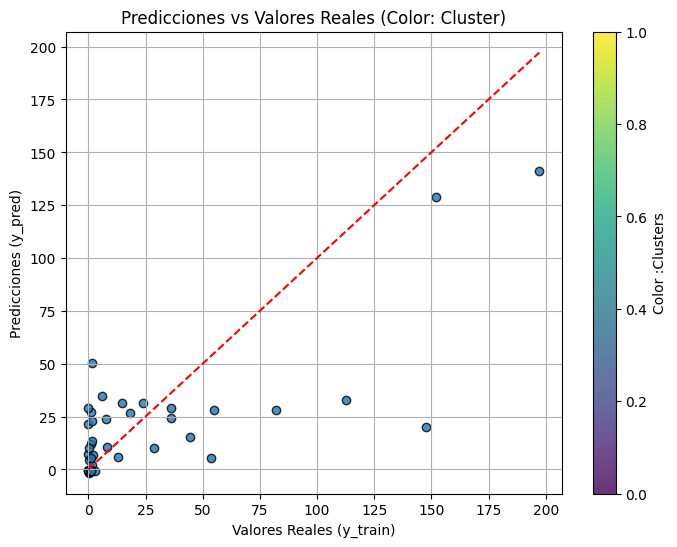

In [32]:
dispersion_pred_real(y_test, y_pred_test )
    #NO hay diferencia entre usar el cluster o no.

# 9. ESTUDIO MODELO - CATEGORICO

In [33]:
#Primero sacamos clasificación del target:
#Merece la pena invertir en el pais o no
y_train
y_train_df = pd.DataFrame(y_train)
y_train_df.head(2)

#Queremos conocer los paises que están por encima del percentil 75% de 50 a 553 wp per capita
cond = y_train_df["capacidad_instalada_wp_per_capita"] > 50

# Asignar 1 a 'inversion' si el valor cumple la condición, sino 0
y_train_df['inversion'] = cond.astype(int)
y_train_df.head(2)

y_train_df.drop(columns = "capacidad_instalada_wp_per_capita", inplace= True)


In [34]:
#Tratamos y_test
y_test_df = pd.DataFrame(y_test)
cond = y_test_df["capacidad_instalada_wp_per_capita"] > 50

# Asignar 1 a 'inversion' si el valor cumple la condición, sino 0
y_test_df['inversion'] = cond.astype(int)

y_test_df.drop(columns = "capacidad_instalada_wp_per_capita", inplace= True)

In [35]:
X_train.columns

Index(['desarrollo_humano_porcentaje', 'pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh',
       'consumo_kwh_per_capita', 'tarifa_luz_uscent/kwh'],
      dtype='object')

In [51]:
# Pipeline 1: Imputación y Escalado
pipeline_numeric = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    # ('imputer', SimpleImputer(strategy='mean')),  # Missings con la media
    # ('scaler', MinMaxScaler())                  # Normalización
])

#Editar X_train, para las features seleccionadas
featur = ['desarrollo_humano_porcentaje', 'pib_usd_per_capita',
       'irradiancia_kwh/m2/day', 'coste_construccion_usd/kwh']
X_train_mean = X_train.copy()
X_test_mean = X_test.copy()

X_train_mean = X_train_mean[featur]
X_test_mean = X_test_mean[featur]


#TRAIN

# Aplicar el primer pipeline (preprocesamiento)
X_train_1 = pipeline_numeric.fit_transform(X_train_mean)
X_train_1_df = pd.DataFrame(X_train_1, columns=X_train_mean.columns, index=X_train_mean.index)


#TEST

#Comprobar con X test
#Transformamos los datos como el Train 
X_test_1= pipeline_numeric.transform(X_test_mean)
X_test_1_df = pd.DataFrame(X_test_1, columns=X_test_mean.columns, index=X_test_mean.index)

In [52]:
#UNDERSAMPLING POR QUE TENEMOS EL DATASET DESBALANCEADOS 
from imblearn.under_sampling import RandomUnderSampler


# Definir el Undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Supongamos que y_train es la variable objetivo
# Aplica el undersampling en X_train_1 y y_train
X_train_1_resampled, y_train_resampled = undersampler.fit_resample(X_train_1_df, y_train_df)

# Convertir a DataFrame para mantener la estructura de datos
X_train_1_resampled_df = pd.DataFrame(X_train_1_resampled, columns=X_train_1_df.columns, index=X_train_1_df.index)
y_train_resampled_df = pd.DataFrame(y_train_resampled, index=X_train_1_df.index)
# Ahora X_train_1_resampled_df es tu conjunto de entrenamiento equilibrado


In [53]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Diccionario con todos los modelos
modelos = {
    # "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    # "SGD Classifier": SGDClassifier(loss="log", random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Perceptrón": Perceptron(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    # "Gaussian Naive Bayes": GaussianNB(),
    # "Multinomial Naive Bayes": MultinomialNB(),
    # "Bernoulli Naive Bayes": BernoulliNB(),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    # # "Bagging": BaggingClassifier(random_state=42),
    # "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    # "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    # "SVM (Linear)": SVC(kernel="linear", probability=True, random_state=42),
    # "SVM (RBF)": SVC(kernel="rbf", probability=True, random_state=42),
    "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
    # "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose = -1),
    "CatBoost": CatBoostClassifier(silent=True, random_state=42)
}



# Evaluar cada modelo
resultados = []
predicciones = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train_1_resampled, y_train_resampled)
    y_pred = modelo.predict(X_test_1_df)
    acc = accuracy_score(y_test_df, y_pred)
    resultados.append((nombre, acc))
    predicciones[nombre] = y_pred

# # Ordenar y mostrar resultados
# df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Métrica"])
df_predicciones = pd.DataFrame(predicciones)

# df_resultados.sort_values(by= "Métrica", ascending = False)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:1303: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarni

In [54]:
from sklearn.metrics import classification_report

for modelo in df_predicciones.columns:
    print (modelo)
    print(classification_report(y_test_df, df_predicciones[modelo]))
    print("\n")

Ridge Classifier
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.38      0.43      0.40         7

    accuracy                           0.78        41
   macro avg       0.63      0.64      0.63        41
weighted avg       0.79      0.78      0.79        41



Perceptrón
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        34
           1       0.00      0.00      0.00         7

    accuracy                           0.83        41
   macro avg       0.41      0.50      0.45        41
weighted avg       0.69      0.83      0.75        41



KNN
              precision    recall  f1-score   support

           0       0.96      0.71      0.81        34
           1       0.38      0.86      0.52         7

    accuracy                           0.73        41
   macro avg       0.67      0.78      0.67        41
weighted avg       0.86      0.73     

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
#NOS INTERESA TENER UN RECALL ALTO DE 1 (SI INVERTIR) porque queremos tener en cuenta todas las opciones de inversión.
#NOS QUEDAMOS CON ADABOOST

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Diccionario con todos los modelos
modelos = {
    "AdaBoost": AdaBoostClassifier(random_state=42),

}



# Evaluar cada modelo
resultados = []
predicciones = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train_1_resampled, y_train_resampled)
    y_pred = modelo.predict(X_test_1_df)
    acc = accuracy_score(y_test_df, y_pred)
    resultados.append((nombre, acc))
    predicciones[nombre] = y_pred

# # Ordenar y mostrar resultados
# df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Métrica"])
df_predicciones = pd.DataFrame(predicciones)

# df_resultados.sort_values(by= "Métrica", ascending = False)

In [60]:



from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Pipeline 2: AdaBoost
pipeline_cluster = Pipeline([
    # ('pca', PCA()),               # Si quisieras usar PCA en el pipeline, descomenta esta línea
    # ('kmeans', KMeans(random_state=42)),  # Descomentar si quieres usar KMeans
    ('adaboost', AdaBoostClassifier())  # AdaBoost Classifier
])

# Definir el espacio de búsqueda de hiperparámetros para AdaBoost
param_grid_cluster = {
    'adaboost__n_estimators': [50, 100, 200],  # Número de estimadores (árboles débiles)
    'adaboost__learning_rate': [0.01, 0.1, 1.0],  # Tasa de aprendizaje
    'adaboost__algorithm': ['SAMME', 'SAMME.R'],
    'adaboost__random_state': [42]  # Algoritmo de AdaBoost, SAMME es más preciso, SAMME.R es más rápido
}

# Definir GridSearchCV
grid_search = GridSearchCV(pipeline_cluster, param_grid_cluster, cv=5)

# Entrenar GridSearchCV aplicado al pipeline
grid_search.fit(X_train_1_resampled, y_train_resampled)

# Parametros y métricas
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score de validación:", grid_search.best_score_, "\n")

# Elegir el mejor modelo
best_pipeline = grid_search.best_estimator_

# Métricas de la validación cruzada con el mejor pipeline
scores = cross_val_score(best_pipeline, X_train_1_resampled, y_train_resampled, cv=5)
print("Puntajes de validación cruzada:", scores)
print("Puntaje promedio de validación cruzada:", scores.mean(), "\n")  # Corregido el acceso a .mean()

# Predecir las etiquetas aplicando el pipeline en entrenamiento
y_pred_train = best_pipeline.predict(X_train_1_resampled)
X_train_1_cluster = X_train_1_resampled.copy()  # Corregido el uso de X_train_1_resampled_df
X_train_1_cluster['Cluster'] = y_pred_train

# Predecir en test (esto es lo que corregimos)
y_pred_test = best_pipeline.predict(X_test_1_df)  # Ahora y_pred_test está correctamente definido
X_test_1_cluster = X_test_1_df.copy()  # Corregido el uso de X_test_1_df
X_test_1_cluster['Cluster'] = y_pred_test

# También puedes obtener un reporte completo con precisión, recall, y F1-score
print(classification_report(y_test_df, y_pred_test))

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConve

Mejores parámetros: {'adaboost__algorithm': 'SAMME', 'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 50, 'adaboost__random_state': 42}
Mejor score de validación: 0.8058823529411765 



c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConve

Puntajes de validación cruzada: [0.58823529 0.94117647 0.8125     0.8125     0.875     ]
Puntaje promedio de validación cruzada: 0.8058823529411765 

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.40      0.57      0.47         7

    accuracy                           0.78        41
   macro avg       0.65      0.70      0.67        41
weighted avg       0.82      0.78      0.79        41



In [71]:
test_set["Cluster"] = y_pred_test
test_set['Inversion'] = cond.astype(int)
test_set["Cluster"].value_counts()

Cluster
0    31
1    10
Name: count, dtype: int64

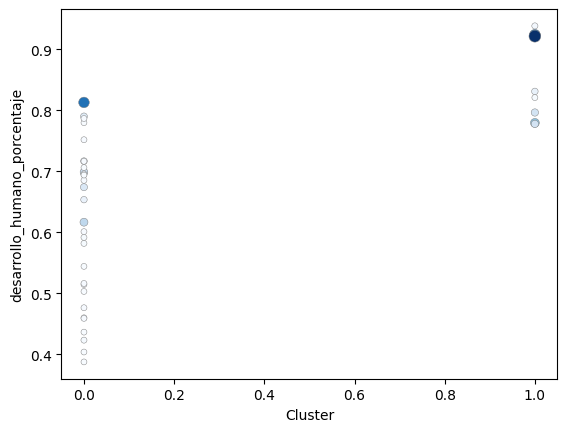

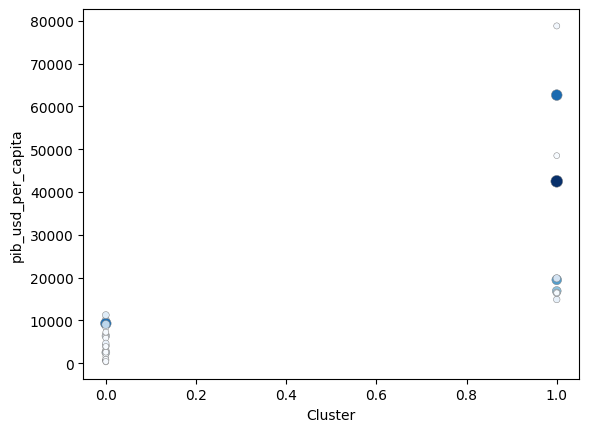

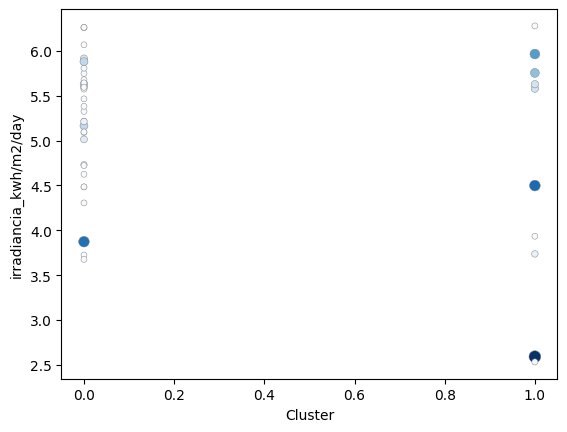

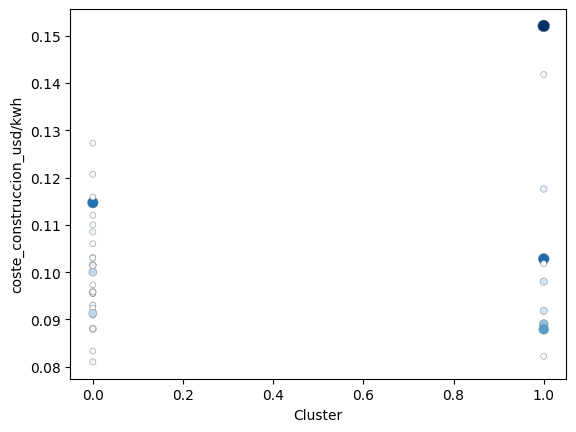

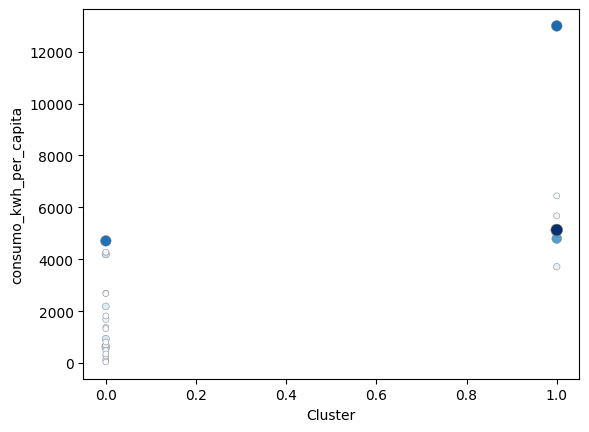

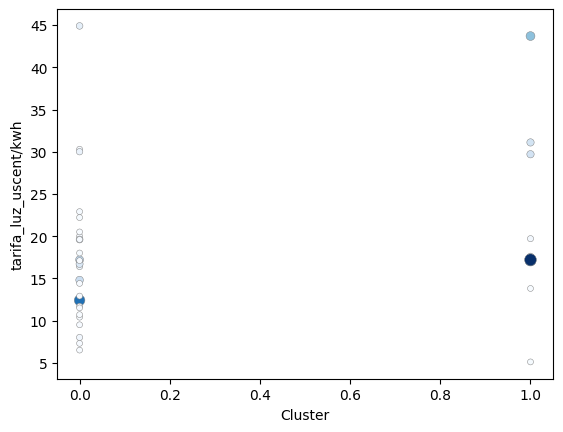

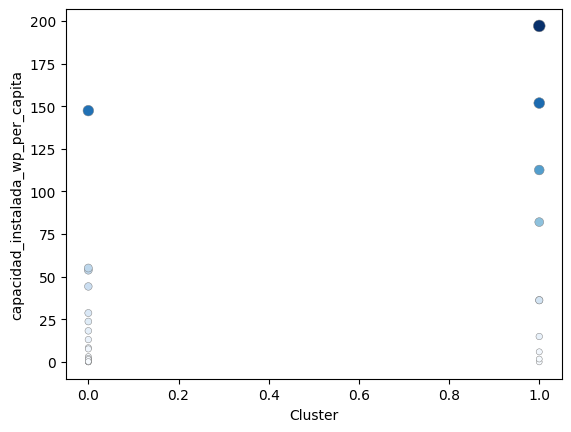

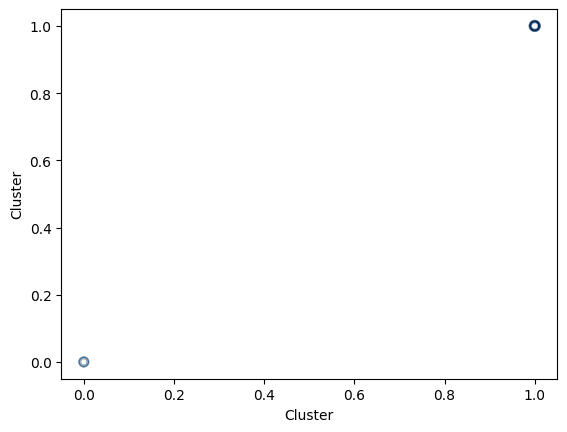

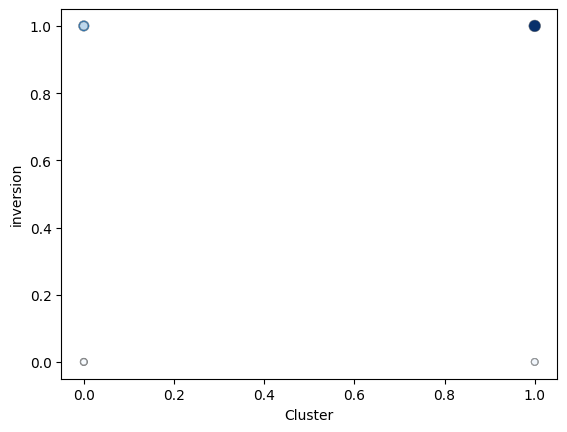

In [68]:
dispersion_3_var(test_set, "Cluster", "capacidad_instalada_wp_per_capita")

In [72]:
test_set.to_csv("./src/data/test_con_solucion.csv")
train_set.to_csv("./src/data/train.csv")

### GRAFICAR PLANO DEL MUNDO

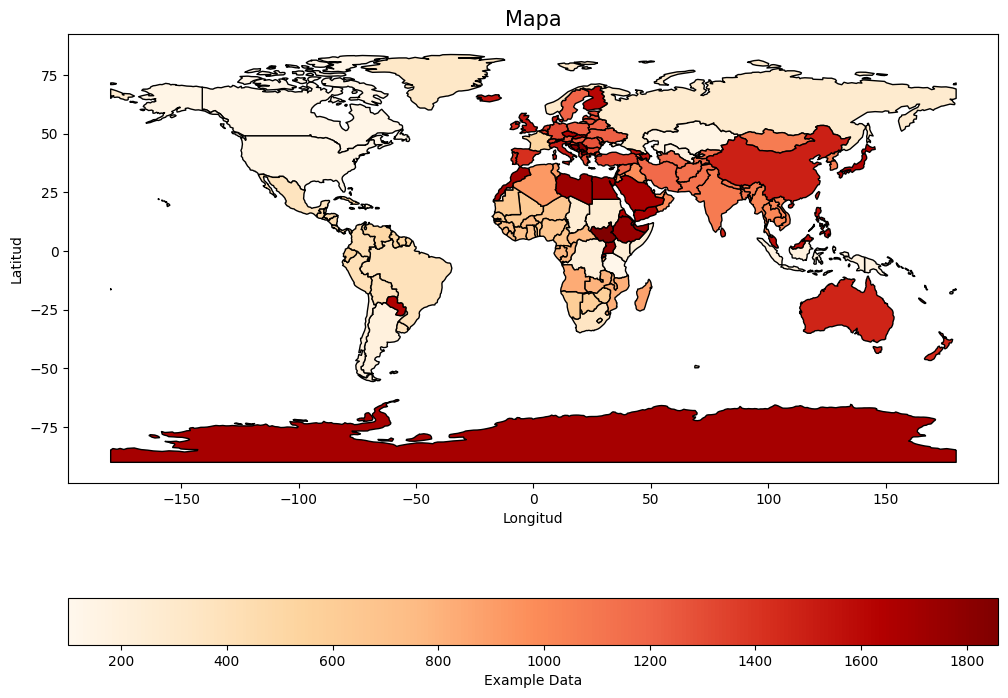

In [70]:
# Cargar el shapefile del mundo
gdf_world = gpd.read_file("./src/data/ne_110m_admin_0_countries.shp")

# Filtrar para mantener solo los países de Europa
# gdf_europe = gdf_world[gdf_world['CONTINENT'] == 'Europe']

# Crear una columna de ejemplo para colorear, puedes reemplazar esto con tus propios datos
# Por ejemplo, podrías agregar una columna con datos de población, PIB, etc.
gdf_world['example_data'] = [100 + i * 10 for i in range(len(gdf_world))]  # Datos de ejemplo

# Crear la visualización
fig, ax = plt.subplots(figsize=(12, 10))

# Dibujar el mapa de Europa con colores basados en 'example_data'
# El parámetro 'cmap' define la paleta de colores
gdf_world.plot(column='example_data', ax=ax, legend=True,
                legend_kwds={'label': "Example Data",
                             'orientation': "horizontal"},
                cmap='OrRd',  # Paleta de colores (puedes cambiar a tu preferencia)
                edgecolor='black')

# Ajustar los detalles del mapa
ax.set_title('Mapa', fontsize=15)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()

#Vemos que funciona

In [101]:

def mapa_mundo_num(df, dato):
    
    '''Tenemos que tener índice llamado "pais" en el df.
        Si no hay pais que coincida con el indice saldrá rayado.
    '''

    import geopandas as gpd
    import matplotlib.pyplot as plt
    # Cargar el shapefile del mundo
    gdf_mundo_sin_index = gpd.read_file("./src/data/ne_110m_admin_0_countries.shp")

    # Renombrar la columna para que coincida
    gdf_mundo_sin_index.rename(columns={"NAME": "pais"}, inplace=True)

    # Establecer el índice para poder unirlos
    gdf_mundo_con_index = gdf_mundo_sin_index.copy()
    gdf_mundo_con_index.set_index("pais", inplace=True)

    # Unir el GeoDataFrame con el DataFrame de datos
    gdf_mundo_con_index = gdf_mundo_con_index.join(df)

    # Verificar si la columna 'dato' existe en el DataFrame unido
    if dato not in gdf_mundo_con_index.columns:
        raise ValueError(f"La columna '{dato}' no existe en el DataFrame.")
    
    # Crear la visualización
    fig, ax = plt.subplots(figsize=(20, 8))

    # Dibujar el mapa del mundo con colores basados en 'dato'
    gdf_mundo_con_index.plot(column=dato,
                             ax=ax,
                             legend=True,
                             cmap="Blues",  # Usamos un cmap que refleja valores numéricos
                             edgecolor='grey',
                             linewidth=0.5,
                             missing_kwds={
                                 "color": "white",  # Color para países sin datos en 'dato'
                                 "edgecolor": "grey",  # Mantener contorno gris
                                 "hatch": "////",  # Rayas en lugar de color
                             })
    
    # Dibujar los países que no están en el DataFrame df con rayas (si no tienen el dato)
    missing_data = gdf_mundo_con_index[gdf_mundo_con_index[dato].isna()]
    missing_data.plot(ax=ax,
                      color='white',  # Fondo blanco para los países sin datos
                      edgecolor='grey',  # Contorno gris
                      hatch='////',  # Rayas
                      linewidth=0.5)
    
    # Ajustar los detalles del mapa
    ax.set_title(dato)
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Mostrar el mapa
    plt.show()

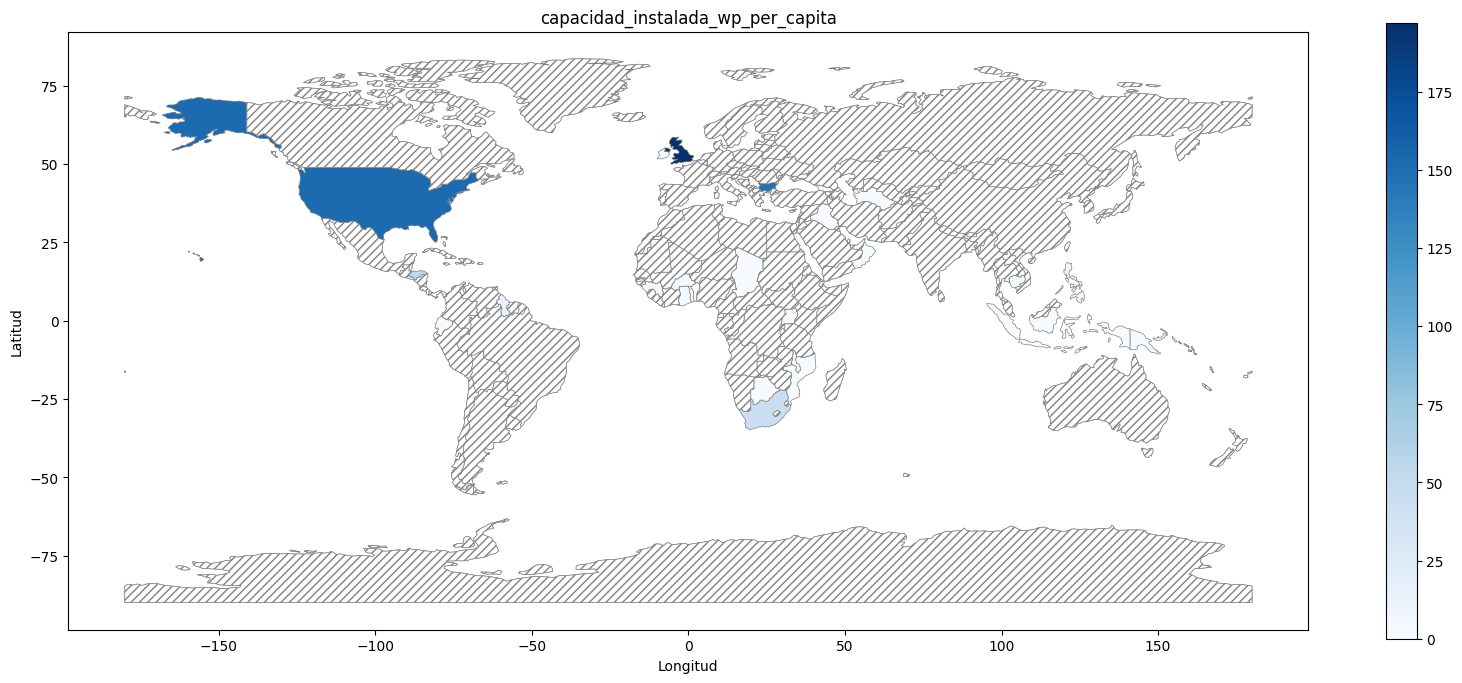

In [102]:
mapa_mundo_num(test_set,'capacidad_instalada_wp_per_capita')

In [ ]:
def mapa_binario(df, dato):

    import geopandas as gpd
    import matplotlib.pyplot as plt
    # Cargar el shapefile del mundo
    gdf_mundo_sin_index = gpd.read_file("./src/data/ne_110m_admin_0_countries.shp")

    # Renombrar la columna para que coincida
    gdf_mundo_sin_index.rename(columns={"NAME": "pais"}, inplace=True)

    # Establecer el índice para poder unirlos
    gdf_mundo_con_index = gdf_mundo_sin_index.copy()
    gdf_mundo_con_index.set_index("pais", inplace=True)

    # Unir el GeoDataFrame con el DataFrame de datos
    gdf_mundo_con_index = gdf_mundo_con_index.join(df)

    # Verificar si la columna 'dato' existe en el DataFrame unido
    if dato not in gdf_mundo_con_index.columns:
        raise ValueError(f"La columna '{dato}' no existe en el DataFrame.")

    # Crear la visualización
    fig, ax = plt.subplots(figsize=(20, 20))

    # Convertimos el dato a tipo binario (0 y 1) en caso de que no lo sea
    gdf_mundo_con_index[dato] = gdf_mundo_con_index[dato].astype('category')

    # Crear la visualización con colores específicos para categorías binarias (0 y 1)
    gdf_mundo_con_index.plot(column=dato,
                             ax=ax,
                             legend=True,
                             cmap="Blues",  # Usamos un cmap que refleja una distinción clara entre los dos valores
                             edgecolor='grey',
                             linewidth=0.5,
                             missing_kwds={
                                 "color": "white",  # Color para países sin datos
                                 "edgecolor": "grey",  # Mantener contorno gris
                                 "hatch": "////",  # Opcional: añadir líneas de trama
                             })

    # Ajustar los detalles del mapa
    ax.set_title(f"Mapa de {dato}")
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Ajustar la leyenda manualmente
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['No invertir', 'Invertir'], title=dato, loc='upper right')

    # Mostrar el mapa
    plt.show()


In [106]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def mapa_binario(df, dato):
    '''Esta función asume que 'df' tiene un índice llamado "pais" y contiene una columna binaria llamada 'dato'.'''

    # Cargar el shapefile del mundo
    gdf_mundo_sin_index = gpd.read_file("./src/data/ne_110m_admin_0_countries.shp")

    # Renombrar la columna para que coincida
    gdf_mundo_sin_index.rename(columns={"NAME": "pais"}, inplace=True)

    # Establecer el índice para poder unirlos
    gdf_mundo_con_index = gdf_mundo_sin_index.copy()
    gdf_mundo_con_index.set_index("pais", inplace=True)

    # Unir el GeoDataFrame con el DataFrame de datos
    gdf_mundo_con_index = gdf_mundo_con_index.join(df)

    # Verificar si la columna 'dato' existe en el DataFrame unido
    if dato not in gdf_mundo_con_index.columns:
        raise ValueError(f"La columna '{dato}' no existe en el DataFrame.")

    # Crear la visualización
    fig, ax = plt.subplots(figsize=(20, 20))

    # Convertir el dato a tipo binario (0 y 1) en caso de que no lo sea
    gdf_mundo_con_index[dato] = gdf_mundo_con_index[dato].astype('category')

    # Crear la visualización con colores específicos para categorías binarias (0 y 1)
    gdf_mundo_con_index.plot(column=dato,
                             ax=ax,
                             legend=True,
                             cmap="Blues",  # Usamos un cmap para mostrar claramente la diferencia entre 0 y 1
                             edgecolor='grey',
                             linewidth=0.5,
                             missing_kwds={
                                 "color": "white",  # Color para países sin datos
                                 "edgecolor": "grey",  # Mantener contorno gris
                                 "hatch": "////",  # Rayas para países sin datos
                             })

    # Crear leyenda personalizada
    handles = [
        mpatches.Patch(color='darkblue', label='Invertir'),  # Color para '1'
        mpatches.Patch(color='lightblue', label='No Invertir')  # Color para '0' (sin datos, fondo blanco)
    ]
    ax.legend(handles=handles, title=dato, loc='upper right')

    # Ajustar los detalles del mapa
    ax.set_title(f"Mapa de {dato}")
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Mostrar el mapa
    plt.show()


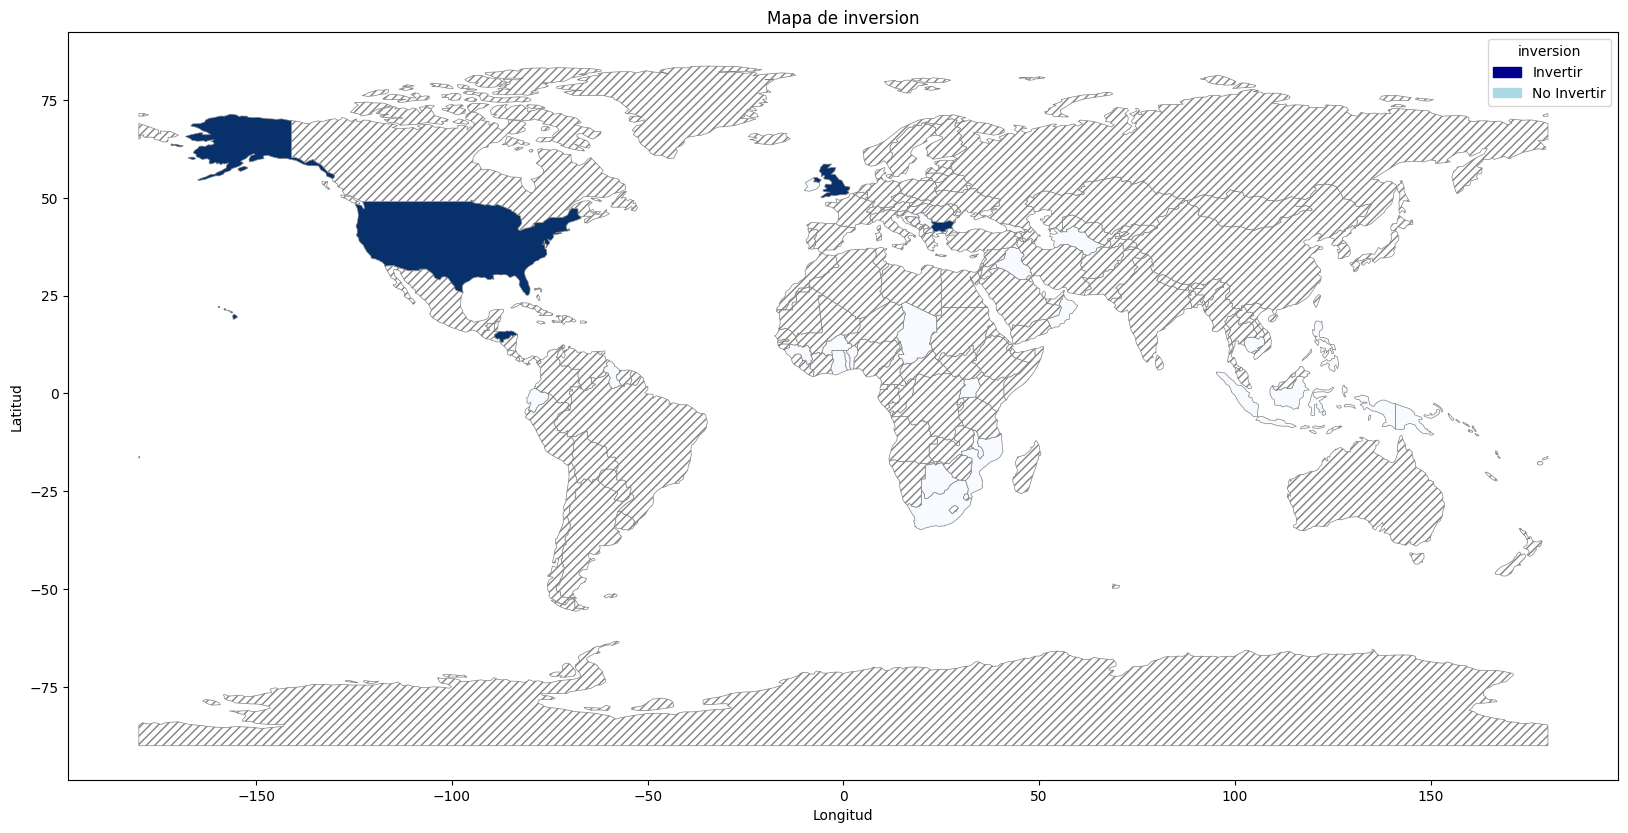

In [107]:
mapa_binario(test_set, "inversion")

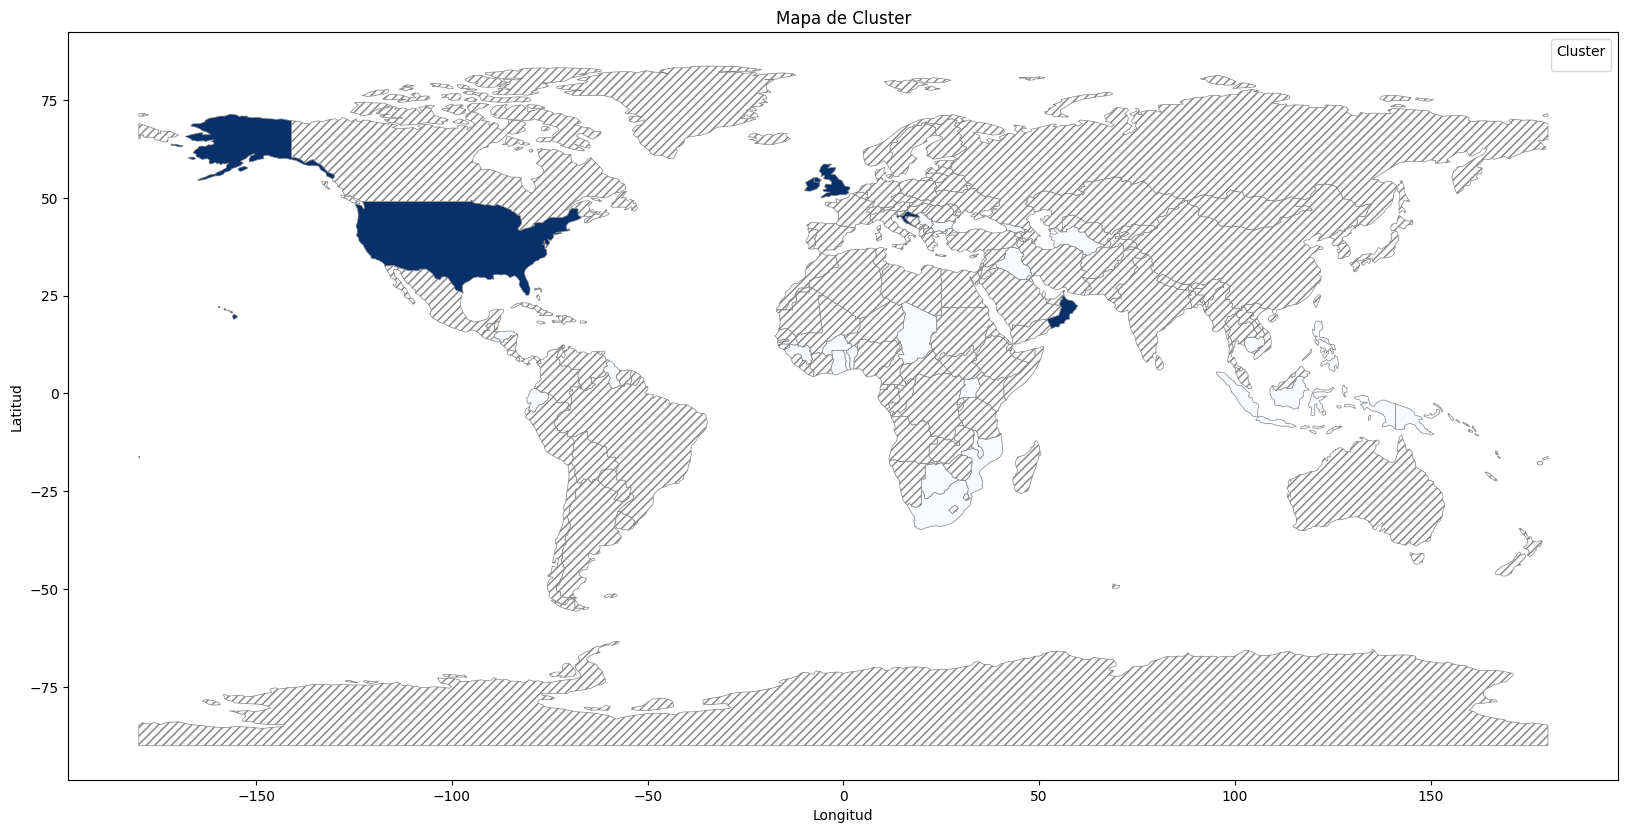

In [91]:
mapa_binario(test_set, "Cluster")